# data_description.ipynb

**Projekt:** Spotify-Datensatz<br>
**Autor:** Erjon Hulaj<br>
**Datum:** 24.03.2025

## Einleitung
In diesem Notebook untersuche ich meinen Datensatz, den ich im ersten Teil bereinigt und hochgeladen habe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/Users/erjon/Library/CloudStorage/OneDrive-AlteKantonsschuleAarau/BBB/Module/2. Jahr/M259/LB/dataset.csv")

df.head(100)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,15BFn2VmEtonsXfNL1lUmy,The Civil Wars,Chill Christmas Dinner,I Heard The Bells On Christmas Day,0,154440,False,0.492,0.1450,...,-14.504,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic
96,96,0WOFJR54wyTwLB11jcBDb1,The Civil Wars,sadsadchristmas,I Heard The Bells On Christmas Day,0,154440,False,0.492,0.1450,...,-14.504,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic
97,97,1uDCw6LVMOmbZ6zRliNcNX,The Civil Wars,Christmas Country Songs 2022,I Heard The Bells On Christmas Day,0,154440,False,0.492,0.1450,...,-14.504,0,0.0422,0.8720,0.000010,0.1070,0.218,90.078,4,acoustic
98,98,7DYsBLdOqz0z14tYWMt2Tn,KT Tunstall,Del gusto de mamá,Hold On,0,177613,False,0.661,0.9370,...,-5.157,0,0.0979,0.3220,0.000001,0.1900,0.805,105.549,4,acoustic


## (2.1) Zielführendes Feld
Ich wähle **popularity** als Target. Das ist ein numerischer Wert (0–100), 
der mir anzeigt, wie beliebt ein Track laut Spotify ist. Die Audio-Features wie `danceability`, 
`energy` und `loudness` könnten Einfluss darauf haben. Da man nicht direkt sieht, wie Popularität mit den anderen Song-Eigenschaften zusammenhängt, eignet sich „popularity“ gut als Ziel für eine Regression.

In [9]:
# (2.2) Statistische Kennzahlen
print("--- Beschreibende Statistik ---")
display(df.describe())

print("\n--- Median pro numerischer Spalte ---")
print(df.median(numeric_only=True))

print("\n--- Standardabweichung pro numerischer Spalte ---")
print(df.std(numeric_only=True))

--- Beschreibende Statistik ---


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000



--- Median pro numerischer Spalte ---
Unnamed: 0           56999.500000
popularity              35.000000
duration_ms         212906.000000
explicit                 0.000000
danceability             0.580000
energy                   0.685000
key                      5.000000
loudness                -7.004000
mode                     1.000000
speechiness              0.048900
acousticness             0.169000
instrumentalness         0.000042
liveness                 0.132000
valence                  0.464000
tempo                  122.017000
time_signature           4.000000
dtype: float64

--- Standardabweichung pro numerischer Spalte ---
Unnamed: 0           32909.109681
popularity              22.305078
duration_ms         107297.712645
explicit                 0.279626
danceability             0.173542
energy                   0.251529
key                      3.559987
loudness                 5.029337
mode                     0.480709
speechiness              0.105732
acousticnes

### Interpretation der Statistik

- **popularity (Median ~35, Std ~22)**  
  Die Popularität liegt für die Hälfte der Songs unter 35, kann aber auch deutlich höher sein. Die Standardabweichung von über 20 zeigt, dass manche Titel stark vom Durchschnitt abweichen.

- **danceability (Median ~0.58), energy (Median ~0.68)**  
  Diese Werte reichen typischerweise von 0 bis 1. Der Median von 0.58 bzw. 0.68 bedeutet, dass rund die Hälfte aller Songs leicht über diesem Bereich liegt und die andere Hälfte darunter. Die moderate Standardabweichung (~0.17–0.25) verweist auf eine mittlere Streuung zwischen sehr tanzbaren und eher ruhigen Titeln.

- **loudness (Median ~–7 dB, Std ~5)**  
  Negative Dezibelwerte sind üblich bei digitaler Musik. Die hohe Standardabweichung zeigt, dass manche Stücke deutlich lauter oder leiser sind als andere.

- **duration_ms (Median ~212 906, Std ~107 298)**  
  Das entspricht im Median etwa 3.5 Minuten Laufzeit. Manche Songs können jedoch viel kürzer oder länger sein, was eine grosse Streuung erklärt.

- **valence (Median ~0.46)**  
  Die Stimmung ist tendenziell neutral bis leicht positiv. Einige Songs sind aber deutlich fröhlicher oder deutlich melancholischer.

Insgesamt gibt es klar erkennbare **Ausreisser** (z. B. extrem lange oder sehr laute/leise Tracks) und teils **hohe Standardabweichungen**, die auf grosse Unterschiede zwischen den Songs im Datensatz hindeuten.

--- Histogramm der Popularity ---


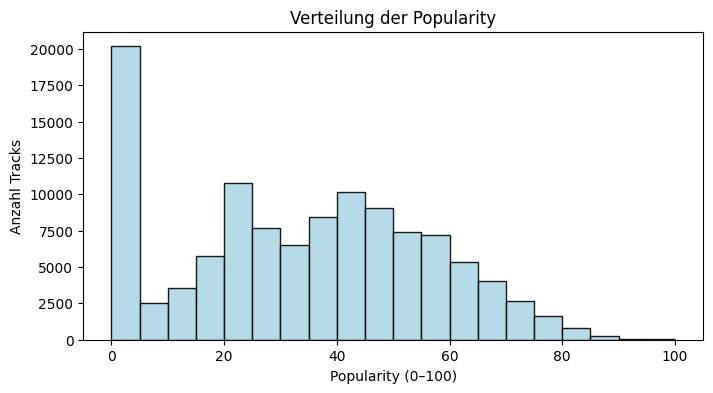

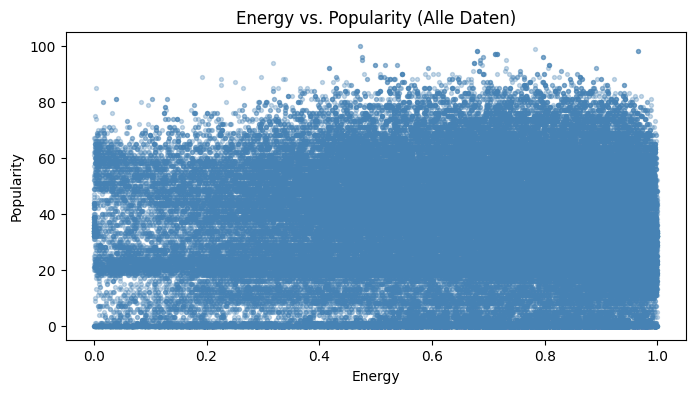

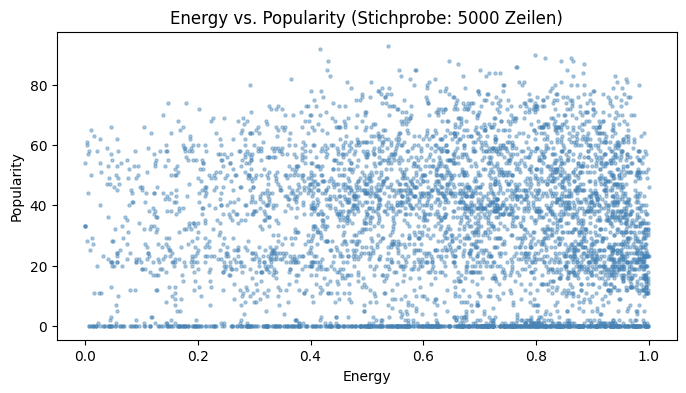

In [21]:
# (2.3) Mindestens eine Grafik
print("--- Histogramm der Popularity ---")
plt.figure(figsize=(8,4))
plt.hist(
    df["popularity"].dropna(), 
    bins=20, 
    color="lightblue", 
    edgecolor="black", 
    alpha=0.9
)
plt.title("Verteilung der Popularity")
plt.xlabel("Popularity (0–100)")
plt.ylabel("Anzahl Tracks")
plt.show()


# 1) Scatterplot mit allen Daten
plt.figure(figsize=(8,4))
plt.scatter(
    df["energy"],
    df["popularity"],
    alpha=0.3, 
    color="steelblue",
    s=8 
)
plt.title("Energy vs. Popularity (Alle Daten)")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

# 2) Scatterplot mit Stichprobe von 5000 Zeilen
sample_df = df.sample(5000, random_state=42)

plt.figure(figsize=(8,4))
plt.scatter(
    sample_df["energy"],
    sample_df["popularity"],
    alpha=0.4, 
    color="steelblue",
    s=5
)
plt.title("Energy vs. Popularity (Stichprobe: 5000 Zeilen)")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

#### Analyse der Diagramme

- **Histogramm der Popularity**  
  Hier sieht man, dass viele Songs im mittleren Bereich (etwa 40–60 Popularity) liegen, 
  während einige Ausreisser sehr niedrige (nahe 0) oder sehr hohe (nahe 100) Popularität aufweisen. 
  Das deutet auf eine breite Streuung hin, was verschiedene Einflüsse auf die Beliebtheit der Tracks nahelegt.

- **Scatterplot (Alle Daten: Energy vs. Popularity)**  
  Da alle Songs auf einmal dargestellt werden, überlappen sich viele Punkte. 
  Man kann aber erahnen, dass höhere Energy-Werte oft mit steigender Popularity einhergehen, 
  ohne dass es eine perfekte Übereinstimmung gibt. 

- **Scatterplot (Stichprobe: 5000 Zeilen)**  
  Durch die reduzierte Datenmenge ist das Bild deutlich übersichtlicher. 
  Nun ist besser erkennbar, dass bei höherer Energy tendenziell häufiger eine hohe Popularity auftritt. 
  Allerdings gibt es auch hier Songs, die von diesem allgemeinen Trend abweichen.

In [13]:
# (2.4) Skalierung
# Beispiel: Wir skalieren popularity auf [0,1], da es 0–100 ist.

scaler = MinMaxScaler()
df['popularity_scaled'] = scaler.fit_transform(df[['popularity']])

df[['popularity','popularity_scaled']].head(10)

,popularity,popularity_scaled
0,73,0.73
1,55,0.55
2,57,0.57
3,71,0.71
4,82,0.82
5,58,0.58
6,74,0.74
7,80,0.80
8,74,0.74
9,56,0.56


### Begründung
Da popularity von 0 bis 100 reicht, andere Audio-Merkmale wie danceability aber in [0,1] liegen, normalisiere ich popularity ebenfalls auf diesen Bereich. Somit können sämtliche Features später für ML-Algorithmen einheitlich interpretiert werden. 
Bei distanzbasierten Ansätzen ist das besonders wichtig, um zu vermeiden, dass ein Feature mit grösseren Zahlenwerten den Gesamtabstand dominiert. Auch neuronale Netze profitieren oft von Features auf ähnlichen Skalen.